In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

sns.set_style("darkgrid")

In [42]:
def loadData(directory):
    
    df = pd.read_csv(directory,sep="\t")
    
    return df

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

In [43]:
print(f"Total number of reviews\t\t {len(X_dev) + len(X_eval)}")
print(f"Developement shape\t\t{X_dev.shape}")
print(f"Evaluation shape\t\t{X_eval.shape}")
print(f"Number of dev duplicates\t {X_dev.duplicated().sum()}")

Total number of reviews		 150930
Developement shape		(120744, 9)
Evaluation shape		(30186, 8)
Number of dev duplicates	 35716


In [44]:
## dev null values
X_dev.isnull().sum()

country            5
description        0
designation    36518
province           5
region_1       20008
region_2       72008
variety            0
winery             0
quality            0
dtype: int64

In [6]:
## eval null values
X_eval.isnull().sum()

country            0
description        0
designation     9217
province           0
region_1        5052
region_2       17969
variety            0
winery             0
dtype: int64

In [79]:
Id = list(X_eval.columns)*2
values = list(X_eval.isnull().sum()) + list(X_dev.isnull().sum())[:-1]
target = ["eval" for i in range(len(X_eval.columns))] + ["dev" for i in range(len(X_eval.columns))]

df_null = pd.DataFrame(dict(Id = Id, Number = values, Target = target ))

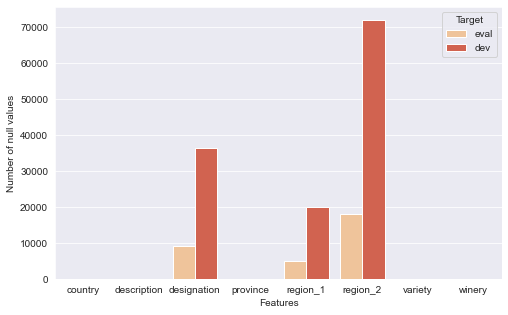

In [102]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(ax=ax, x="Id", y="Number", hue="Target", data=df_null, palette="OrRd")
plt.xlabel("Features")
plt.ylabel("Number of null values")
plt.savefig('Images/Image1.svg', format="svg")

## Questions

* See the categorical values and their cardinalities.
* What are the countries with more wines? And provinces? And Regions? 
* What are the average rates per country? And for designation? 
* What are the wines with the best and the worse quality? 
* What are the most used words for the description? 
* What is the length distribution for the description? 


In [50]:
countries = Counter(X_dev["country"])
print(f"Number of different countries : {len(countries)}")
print(f"Countries with a treshold of 10 : {len([ 1  for country in countries.most_common() if (country[1] >= 1000)])}")
countries.most_common()

Number of different countries : 49
Countries with a treshold of 10 : 12


[('US', 49908),
 ('Italy', 18848),
 ('France', 16835),
 ('Spain', 6657),
 ('Chile', 4647),
 ('Argentina', 4519),
 ('Portugal', 4228),
 ('Australia', 3949),
 ('New Zealand', 2646),
 ('Austria', 2447),
 ('Germany', 1963),
 ('South Africa', 1796),
 ('Greece', 711),
 ('Israel', 499),
 ('Hungary', 187),
 ('Canada', 153),
 ('Romania', 115),
 ('Uruguay', 81),
 ('Croatia', 72),
 ('Slovenia', 71),
 ('Bulgaria', 63),
 ('Moldova', 51),
 ('Mexico', 47),
 ('Turkey', 39),
 ('Georgia', 36),
 ('Lebanon', 31),
 ('Cyprus', 25),
 ('Brazil', 21),
 ('Macedonia', 14),
 ('Serbia', 10),
 ('Morocco', 10),
 ('Luxembourg', 7),
 ('England', 7),
 ('Czech Republic', 6),
 ('Lithuania', 5),
 ('India', 5),
 (nan, 5),
 ('Ukraine', 4),
 ('South Korea', 4),
 ('Egypt', 3),
 ('Slovakia', 3),
 ('China', 3),
 ('Bosnia and Herzegovina', 3),
 ('Switzerland', 3),
 ('Japan', 2),
 ('Montenegro', 2),
 ('US-France', 1),
 ('Tunisia', 1),
 ('Albania', 1)]

In [33]:
## 1 - Cardinalities of categorical attributes
designation_counter = Counter(X_dev["designation"])
print(f"Number of different designations : {len(designation_counter)}")
print(f"Designations with a treshold of 100 : {len([ 1  for d in designation_counter.most_common() if (d[1] >= 200)])}")

designation_counter.most_common()

Number of different designations : 27801
Designations with a treshold of 100 : 15


[(nan, 36518),
 ('Reserve', 2189),
 ('Reserva', 1436),
 ('Estate', 1245),
 ('Barrel sample', 1069),
 ('Riserva', 609),
 ('Barrel Sample', 505),
 ('Brut', 483),
 ('Crianza', 398),
 ('Estate Grown', 362),
 ('Estate Bottled', 318),
 ('Dry', 303),
 ('Old Vine', 277),
 ('Gran Reserva', 263),
 ('Brut Rosé', 208),
 ('Extra Dry', 194),
 ('Vieilles Vignes', 179),
 ('Bien Nacido Vineyard', 152),
 ('Rosé', 141),
 ('Late Bottled Vintage', 136),
 ('Réserve', 136),
 ('Unoaked', 134),
 ('Single Vineyard', 126),
 ('Late Harvest', 125),
 ('Tradition', 117),
 ('Vintage', 116),
 ('Barrel Select', 113),
 ('Grand Reserve', 107),
 ('Classic', 101),
 ('Estate Reserve', 98),
 ('Tinto', 97),
 ('Old Vines', 94),
 ('Special Reserve', 89),
 ('Barrel Fermented', 87),
 ('Signature', 84),
 ('Kosher', 82),
 ('Private Reserve', 79),
 ('Red Wine', 79),
 ("Rosella's Vineyard", 77),
 ('Semi-Dry', 75),
 ('Roble', 73),
 ("Proprietor's Reserve", 70),
 ('Ciel du Cheval Vineyard', 69),
 ("Garys' Vineyard", 66),
 ('Rosé of', 6

In [36]:
designation_province = Counter(X_dev["province"])
print(f"Number of different provinces : {len(designation_province)}")
print(f"Provinces with a treshold of 100 : {len([ 1  for d in designation_province.most_common() if (d[1] >= 3000)])}")

designation_province.most_common()

Number of different provinces : 445
Provinces with a treshold of 100 : 10


[('California', 35572),
 ('Washington', 7818),
 ('Tuscany', 5843),
 ('Bordeaux', 4866),
 ('Northern Spain', 3930),
 ('Mendoza Province', 3795),
 ('Oregon', 3661),
 ('Burgundy', 3447),
 ('Piedmont', 3279),
 ('Veneto', 3186),
 ('South Australia', 2401),
 ('Sicily & Sardinia', 2025),
 ('New York', 1945),
 ('Northeastern Italy', 1580),
 ('Loire Valley', 1403),
 ('Alsace', 1357),
 ('Marlborough', 1304),
 ('Southwest France', 1267),
 ('Central Italy', 1222),
 ('Southern Italy', 1183),
 ('Champagne', 1089),
 ('Rhône Valley', 1082),
 ('Catalonia', 1070),
 ('Colchagua Valley', 975),
 ('Languedoc-Roussillon', 857),
 ('Douro', 855),
 ('Provence', 810),
 ('Port', 730),
 ('Other', 724),
 ('Maipo Valley', 721),
 ('Alentejano', 694),
 ('Mosel', 633),
 ('Casablanca Valley', 621),
 ('Burgenland', 617),
 ('Central Spain', 611),
 ('Stellenbosch', 570),
 ('Victoria', 489),
 ('Lombardy', 476),
 ('Galicia', 447),
 ('Australia Other', 440),
 ('Maule Valley', 427),
 ('Mosel-Saar-Ruwer', 426),
 ('Beaujolais', 

In [37]:
designation_region_1 = Counter(X_dev["region_1"])
print(f"Number of different region_1 : {len(designation_region_1)}")
print(f"Provinces with a treshold of 100 : {len([ 1  for d in designation_region_1.most_common() if (d[1] >= 500)])}")


designation_region_1.most_common()

Number of different region_1 : 1207
Provinces with a treshold of 100 : 41


[(nan, 20008),
 ('Napa Valley', 4983),
 ('Columbia Valley (WA)', 3988),
 ('Mendoza', 2864),
 ('Russian River Valley', 2842),
 ('California', 2757),
 ('Paso Robles', 2450),
 ('Willamette Valley', 1647),
 ('Rioja', 1524),
 ('Toscana', 1517),
 ('Sonoma County', 1489),
 ('Brunello di Montalcino', 1387),
 ('Sicilia', 1341),
 ('Alsace', 1271),
 ('Sonoma Coast', 1174),
 ('Carneros', 1141),
 ('Dry Creek Valley', 1122),
 ('Barolo', 1116),
 ('Champagne', 1088),
 ('Finger Lakes', 1084),
 ('Santa Barbara County', 1036),
 ('Walla Walla Valley (WA)', 966),
 ('Yakima Valley', 940),
 ('Alexander Valley', 924),
 ('Chianti Classico', 849),
 ('Santa Lucia Highlands', 775),
 ('Sta. Rita Hills', 775),
 ('Sonoma Valley', 767),
 ('Central Coast', 766),
 ('Ribera del Duero', 719),
 ('Santa Ynez Valley', 698),
 ('Lodi', 697),
 ('Saint-Émilion', 677),
 ('Santa Maria Valley', 658),
 ('Chablis', 553),
 ('Côtes de Provence', 552),
 ('McLaren Vale', 543),
 ('Amarone della Valpolicella Classico', 530),
 ('Anderson V

In [10]:
# I think it can be avoided -> Too general 
designation_region_2 = Counter(X_dev["region_2"])
print(f"Number of different region_2 : {len(designation_region_2)}")
designation_region_2.most_common()[:10]

Number of different region_2 : 19


[(nan, 50734),
 ('Central Coast', 7285),
 ('Sonoma', 6270),
 ('Columbia Valley', 5251),
 ('Napa', 5059),
 ('California Other', 1967),
 ('Willamette Valley', 1729),
 ('Mendocino/Lake Counties', 1369),
 ('Sierra Foothills', 925),
 ('Napa-Sonoma', 891)]

In [38]:
# I think it can be avoided -> Too general 
designation_variety = Counter(X_dev["variety"])
print(f"Number of different varieties : {len(designation_variety)}")
print(f"Provinces with a treshold of 100 : {len([ 1  for d in designation_variety.most_common() if (d[1] >= 1000)])}")


designation_variety.most_common()

Number of different varieties : 603
Provinces with a treshold of 100 : 28


[('Chardonnay', 11534),
 ('Pinot Noir', 11424),
 ('Cabernet Sauvignon', 10270),
 ('Red Blend', 8060),
 ('Bordeaux-style Red Blend', 5821),
 ('Sauvignon Blanc', 4986),
 ('Syrah', 4655),
 ('Riesling', 4424),
 ('Merlot', 4070),
 ('Zinfandel', 3045),
 ('Sangiovese', 2688),
 ('Malbec', 2584),
 ('White Blend', 2255),
 ('Rosé', 2244),
 ('Tempranillo', 2054),
 ('Nebbiolo', 1794),
 ('Portuguese Red', 1744),
 ('Sparkling Blend', 1594),
 ('Shiraz', 1571),
 ('Corvina, Rondinella, Molinara', 1335),
 ('Rhône-style Red Blend', 1233),
 ('Cabernet Franc', 1119),
 ('Pinot Gris', 1098),
 ('Barbera', 1081),
 ('Pinot Grigio', 1065),
 ('Sangiovese Grosso', 1060),
 ('Viognier', 1011),
 ('Bordeaux-style White Blend', 1008),
 ('Champagne Blend', 991),
 ('Port', 851),
 ('Grüner Veltliner', 819),
 ('Gewürztraminer', 786),
 ('Portuguese White', 759),
 ('Petite Sirah', 717),
 ('Tempranillo Blend', 614),
 ('Chenin Blanc', 608),
 ('Carmenère', 603),
 ('Glera', 511),
 ('Grenache', 492),
 ('Prosecco', 479),
 ('Albariñ

In [39]:
# I think it can be avoided -> Too general 
designation_winery = Counter(X_dev["winery"])
print(f"Number of different wineries : {len(designation_winery)}")
print(f"Provinces with a treshold of 100 : {len([ 1  for d in designation_winery.most_common() if (d[1] >= 100)])}")

designation_winery.most_common()

Number of different wineries : 14105
Provinces with a treshold of 100 : 45


[('Williams Selyem', 313),
 ('Testarossa', 215),
 ('DFJ Vinhos', 198),
 ('Chateau Ste. Michelle', 184),
 ('Columbia Crest', 174),
 ('Bouchard Père & Fils', 168),
 ('Concha y Toro', 166),
 ('Kendall-Jackson', 163),
 ('Trapiche', 156),
 ('Joseph Drouhin', 156),
 ('Kenwood', 154),
 ('De Loach', 154),
 ('Georges Duboeuf', 152),
 ('Albert Bichot', 144),
 ('Wines & Winemakers', 139),
 ('Cameron Hughes', 136),
 ('Robert Mondavi', 131),
 ('Louis Latour', 126),
 ('Errazuriz', 125),
 ('Martin Ray', 124),
 ('Concannon', 123),
 ('Dry Creek Vineyard', 121),
 ('Morgan', 119),
 ('Olivier Leflaive', 119),
 ("L'Ecole No. 41", 118),
 ("D'Arenberg", 117),
 ('Waterbrook', 117),
 ('Iron Horse', 116),
 ('Calera', 114),
 ('Yalumba', 112),
 ('Bodega Norton', 111),
 ('Hogue', 111),
 ('Santa Rita', 110),
 ('Gary Farrell', 110),
 ('Renwood', 109),
 ('Sineann', 109),
 ('Montes', 107),
 ('Rodney Strong', 107),
 ('Wellington', 106),
 ('Seven Hills', 104),
 ('Planeta', 103),
 ('Saint Clair', 103),
 ('Novy', 102),
 (

### Quality distribution

<AxesSubplot:xlabel='quality'>

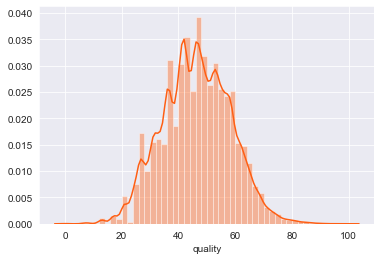

In [7]:
## scores distribution 
sns.distplot(X_dev["quality"].round(),color="#ff5e13")

In [8]:
print(f"Average quality: {np.mean(X_dev['quality'])}")

Average quality: 46.27785231564302


### Number of wines with a score below 10 and above 90

In [9]:
print(f"Number of wines with a score below 10 : {len(X_dev [ X_dev['quality'] <= 10 ] )} ")
print(f"Number of wines with a score above 90 : {len(X_dev [ X_dev['quality'] >= 90 ] )} ")

Number of wines with a score below 10 : 84 
Number of wines with a score above 90 : 29 


## Country

### Number of reviews per Country

Text(0, 0.5, 'Country')

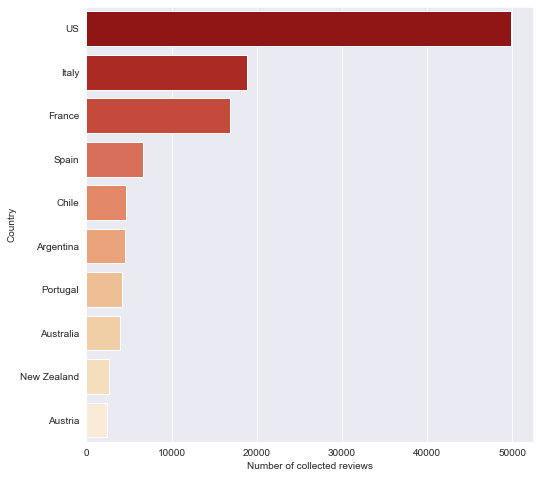

In [104]:
fig, ax = plt.subplots(figsize=(8, 8))
wines_per_country  = Counter(X_dev['country']).most_common()[:10]

labels = [ couple[0] for couple in wines_per_country ]
values = [ couple[1] for couple in wines_per_country ]

sns.barplot(ax=ax, x=values, y=labels, palette="OrRd_r")
plt.xlabel("Number of collected reviews")
plt.ylabel("Country")

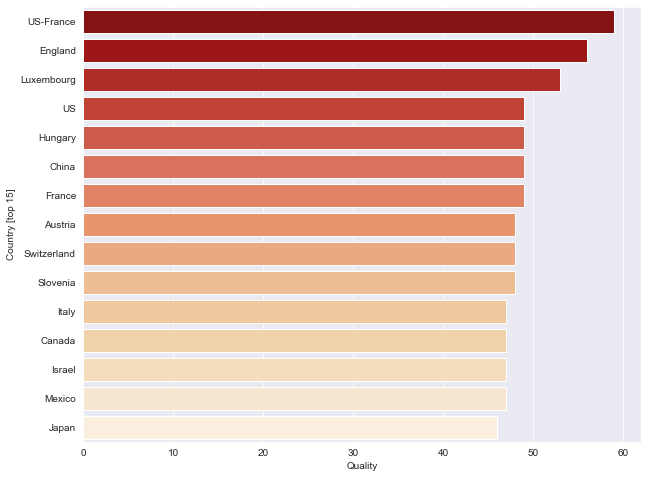

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))

avg_df_country = X_dev.groupby('country').median().sort_values(by="quality",ascending=False)[:15]
sns.barplot(ax=ax, x=avg_df_country.values.reshape(1,-1)[0], y=avg_df_country.index, palette="OrRd_r")
plt.xlabel("Quality")
plt.ylabel("Country [top 15]")
plt.savefig('Images/Image2.svg', format="svg")

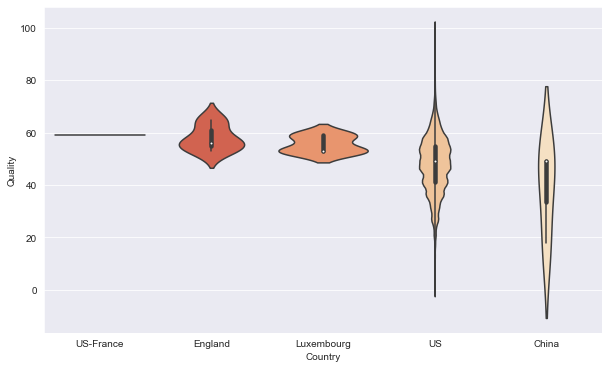

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

order = X_dev.groupby('country').quality.median().sort_values(ascending=False).index[:5]
sns.violinplot(data=X_dev, y='quality', x='country', order=order, palette="OrRd_r")
plt.ylabel("Quality")
plt.xlabel("Country")
plt.savefig('Images/Image3.svg', format="svg")

## Description analysis

In [29]:
print(f"values: {X_dev['description'].shape}")
print(f"unique values: {len(X_dev['description'].value_counts())}")

values: (120744,)
unique values: 85005


In [31]:
120744 - 85005

35739

Average length: 240.51
Minimum length: 17
Maximum length: 764


<AxesSubplot:xlabel='description_length'>

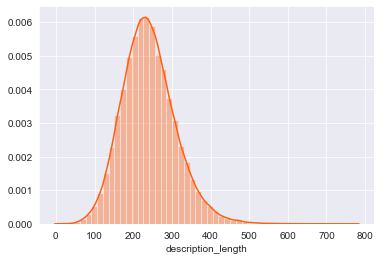

In [42]:
X_temp = X_dev[['description','quality']].copy()
X_temp['description_length'] = X_temp['description'].apply(lambda x : len(x))

print(f"Average length: {np.round(np.mean(X_temp['description_length']),2)}")
print(f"Minimum length: {np.min(X_temp['description_length'])}")
print(f"Maximum length: {np.max(X_temp['description_length'])}")

sns.distplot(X_temp['description_length'], color="#ff5e13")

## Correlation among length and quality 

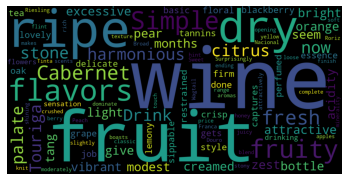

In [183]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import random

wc = WordCloud(width=1200, height=600,max_words=100, stopwords = STOPWORDS,
               min_word_length=3, min_font_size=3).generate(''.join(str(X_temp['description'].values)))

plt.imshow(wc.recolor(random_state=3))
plt.axis('off')
plt.savefig("fig2.svg", format="svg")

### Notes

* Making a country as a one-hot vector is not desirable as if your dataset contains all the countries in the earth, your one-hot vector would be mostly zero which increases your train and run-time complexities. Instead, calculate the distance of each country from a single point on earth. Ex: Distance of each of those countries from the equator or south pole or north pole and add it as a feature instead of a one-hot vector.
* https://stats.stackexchange.com/questions/411767/encoding-of-categorical-variables-with-high-cardinality [hashing]
* Check if we have some categorical attribute that it is not present in the evaluation set -> Highlight this aspect on the report

In [68]:
X_eval.isnull().sum()

country            0
description        0
designation     9217
province           0
region_1        5052
region_2       17969
variety            0
winery             0
dtype: int64